In [67]:
import pickle
from feda_tools import fileselector as fs
import tttrlib
import matplotlib.pyplot as plt
import time

## Extract and Load Burst Dict Pickle File

In [3]:
pickle_file = fs.gui_fname()

In [4]:
# test that the loaded burst is identical to the pickled burst.
with open(pickle_file[0], 'rb') as file:
    burst_dict = pickle.load(file)

## Load 

In [70]:
prompt_end = 12499
delay_end = 25000

In [71]:
min_photon_count = 60
sig_ratio_list = list()

start_time = time.time()
for ptu_file, burst_index in sorted_burst_dict.items():
    ptu_filename = ptu_file.split("/")[-1]
    print("calculating signal ratio for " + ptu_filename)

    data_ptu = tttrlib.TTTR(ptu_file, 'PTU')
    routing_channels =  data_ptu.routing_channels
    all_macro_times = data_ptu.macro_times
    all_micro_times = data_ptu.micro_times
    
    for burst in burst_index:

        # filter out bursts with one or less photons.
        if len(burst) <= min_photon_count:
            continue
    
        # get green prompt count where the corresponding channel is 2 or 0 and 0 < micro time < 12499 (prompt) using list comprehension 
        green_photons = [index for index in burst if 
                           routing_channels[index] == 2 or 
                           routing_channels[index] == 0 and
                           0 < all_micro_times[index] < prompt_end
                      ]
        green_count = len(green_photons)
        # print("green " + str(green_count))
    
        # get red prompt count where the corresponding channel is 2 or 0 and 0 < micro time < 12499 (prompt) using list comprehension 
        red_photons = [index for index in burst if 
                           routing_channels[index] == 3 or 
                           routing_channels[index] == 1 and
                           0 < all_micro_times[index] < prompt_end
                      ]
        red_count = len(red_photons)
        # print("red " + str(red_count))
    
        # get red delay (yellow) count where the corresponding channel is 3 or 1 and 12499 < micro time < 25000 (prompt) using list comprehension 
        yellow_photons = [index for index in burst if 
                           routing_channels[index] == 3 or 
                           routing_channels[index] == 1 and
                           prompt_end < all_micro_times[index] < delay_end
                      ]
        yellow_count = len(yellow_photons)
        # print("yellow " + str(yellow_count))
    
        sig_ratio = ( green_count + red_count ) / ( green_count + red_count + yellow_count )
        sig_ratio_list.append(sig_ratio)
end_time = time.time()

# Calculate the duration
duration = end_time - start_time
    
# Print the duration in seconds
print(f"The loop took {duration} seconds to run.")

calculating signal ratio for Split_After_Adjust_LF_7200s_pinhole6-000000.ptu
calculating signal ratio for Split_After_Adjust_LF_7200s_pinhole6-000001.ptu
calculating signal ratio for Split_After_Adjust_LF_7200s_pinhole6-000002.ptu
calculating signal ratio for Split_After_Adjust_LF_7200s_pinhole6-000003.ptu
calculating signal ratio for Split_After_Adjust_LF_7200s_pinhole6-000004.ptu
calculating signal ratio for Split_After_Adjust_LF_7200s_pinhole6-000005.ptu
calculating signal ratio for Split_After_Adjust_LF_7200s_pinhole6-000006.ptu
calculating signal ratio for Split_After_Adjust_LF_7200s_pinhole6-000007.ptu
The loop took 44.642826080322266 seconds to run.


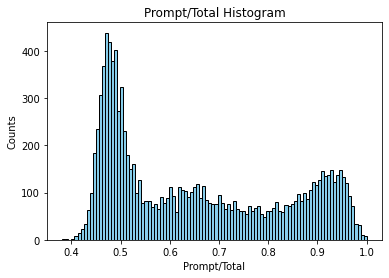

In [72]:
plt.hist(sig_ratio_list, bins=100, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Prompt/Total')
plt.ylabel('Counts')
plt.title('Prompt/Total Histogram')

# Display the plot
plt.show()